# ARIMA'yı Ayrıştırma ile Birleştirmek

Basit bir ARIMA modeli sürecini zaten ele almıştık. Bu alıştırmada, derste gördüğünüz `seasonal decompose` aracıyla bir ARIMA modelinin kombinasyonunu kullanarak bu konuyu biraz daha geliştireceğiz. Mevsimsellikle __özel olarak__ başa çıkmak için kullanabileceğimiz modeller var, ancak burada adım adım ilerleyerek bu zaman serisini manuel olarak parçalayacağız, böylece onu tam olarak anlayacağız ve TS verileriyle çalışırken karşılaşabileceğimiz sorunları öğreneceğiz.

Bu challenge için günlük CO2 ppm ölçümleriyle çalışacağız, özellikle Mauna Loa Gözlemevi'nden alınan günlük CO2 ölçümleriyle 🌋

Bu ölçümler 1958'den beri alınıyor ve iklim biliminin temel taşlarından biri. Hawaii'de 3.000 metreden fazla yükseklikte konumlanmış olan gözlemevi, yerel emisyonlardan büyük ölçüde uzak olarak küresel atmosferik karbon seviyelerini izlemek için ideal bir konumdadır. Kayıtlar sağlam olmasına rağmen, __ara sıra enstrüman sorunları veya aşırı hava koşulları nedeniyle boşluklar içermektedir__, araştırmacılar bu kritik veri setinin bütünlüğünü korumak için analizlerinde bunları hesaba katmalıdır. 1974'ten beri __neredeyse__ günlük olarak alınan verilerin bir kısmını kullanacağız - notebook boyunca verilerdeki boşlukları ele alacağız!

Laboratuvarın yaptığı iklim çalışmaları hakkında merak ediyorsanız, buradan daha fazla bilgi edinebilirsiniz: https://gml.noaa.gov/ccgg/about/co2_measurements.html

## Veriyi Yükleme ve Keşfetme

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("https://d32aokrjazspmn.cloudfront.net/materials/co2_daily_mlo.csv")

In [3]:
df

,year,month,day,CO2 molfrac (ppm)
0,1974,5,17,333.38
1,1974,5,18,333.11
2,1974,5,19,333.46
3,1974,5,20,333.64
4,1974,5,21,333.50
...,...,...,...,...
15191,2023,10,19,419.44
15192,2023,10,20,419.53
15193,2023,10,21,418.90
15194,2023,10,23,419.09


Verilerin çalışmamız için pek güzel formatlanmadığını görebiliyoruz, bu yüzden önce `pd.to_datetime()` kullanarak bu adımı çözelim (bu fonksiyonu aynı anda birden fazla sütunda kullanabilirsiniz 👀). Daha fazla bilgi için [dokümanları](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) kontrol edin.

Doğru şekilde formatladıktan sonra, bunu index olarak ayarlayın.

In [21]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])
df = df.set_index("date").sort_index()

CO2 değerlerinizi çizdirin ve partnerinizle ne gördüğünüzü tartışın. Verilerinizde herhangi bir boşluk var gibi görünüyor mu? __Emin misiniz__? DataFrame'inizin ilk 50 değerini kontrol edin

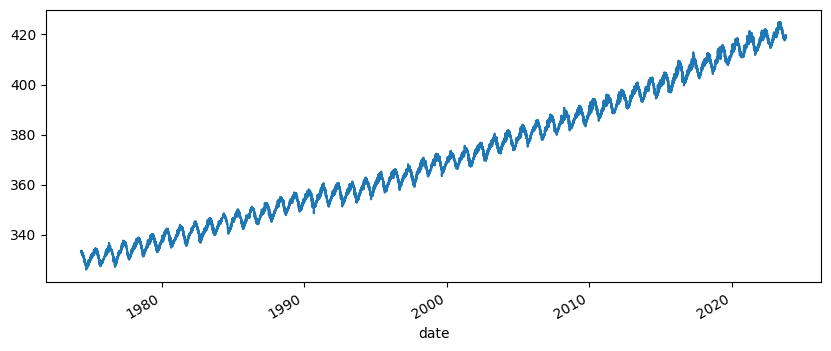

In [5]:
df["CO2 molfrac (ppm)"].plot(figsize=(10, 4))
plt.show()

In [6]:
df.head(50)

,year,month,day,CO2 molfrac (ppm)
date,,,,
1974-05-17,1974,5,17,333.38
1974-05-18,1974,5,18,333.11
1974-05-19,1974,5,19,333.46
1974-05-20,1974,5,20,333.64
1974-05-21,1974,5,21,333.50
1974-05-22,1974,5,22,333.21
1974-05-23,1974,5,23,333.05
1974-05-26,1974,5,26,333.32
1974-05-27,1974,5,27,332.79


Bazı tarihleri kaybetmişiz 😱 Açık `NaN` değerlerimiz olmasa da, index'imizde eksik tarihler var. Bu, TS verileriyle çalışırken __gerçekten__ dikkatli olmanız gereken bir şey.

Kaç gün eksik olduğumuzu hesaplayalım. Bitiş tarihinizi (`index`'inizin `max()`'ı) başlangıç tarihinizden (`index`'inizin `min()`'ı) çıkararak ikisi arasında kaç gün __olması gerektiğini__ görelim.

In [11]:
expected_days = (df.index.max() - df.index.min()).days
expected_days

18057

Bu, DataFrame'imizde __gerçekten__ sahip olduğumuz gün sayısından nasıl farklı? Cevabınızı `missing` değişkenine kaydedin

In [12]:
missing = expected_days - df.shape[0]
missing

-1

In [22]:
expected_days = (df.index.max() - df.index.min()).days
missing = expected_days - df.shape[0]
missing

2861

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('missing',
                         missing = missing)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 1 item

test_missing.py::TestMissing::test_missing PASSED                        [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/missing.pickle

git commit -m 'Completed missing step'

git push origin master



Eksik değerlerin gerçekte nerede olduğunu görelim. Sahip __olmamız gereken__ index'i oluşturmak için `pd.date_range` kullanın. Ardından DataFrame'in `.reindex()` fonksiyonunu bu yeni tarih aralığıyla kullanarak ilk 100 girişimizde null değerlerin gerçekte nerede olduğunu görün!

In [24]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")
df = df.reindex(full_index)

Buradaki en basit seçenek, çok kullanışlı olan `pd.interpolate("linear")` fonksiyonunu kullanarak bunları bizim için doldurmak. Ne yaptığını görmek için aşağıdaki hücreyi çalıştırmayı deneyin:

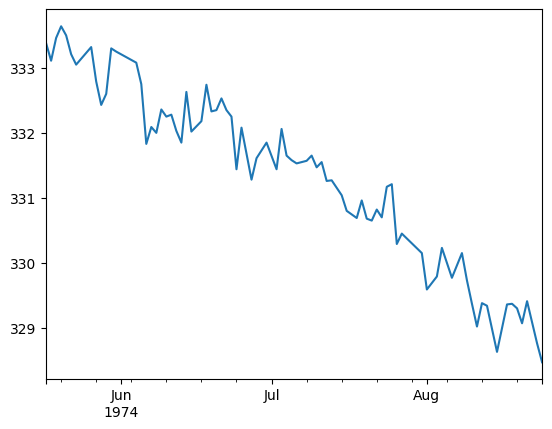

In [25]:
df["CO2 molfrac (ppm)"][:100].interpolate("linear").plot();

Interpolation bizim için noktaları bağlamak için basit bir doğrusal yöntem kullanır 😊 Tabii ki bu mükemmel olmayan bazı varsayımlar yapıyor ve aslında günlük örneklere ihtiyacımız yok - bunun yerine DataFrame'imizi aylık bazda `resample` edeceğiz ve bunu modellemeye çalışacağız. Her ayın ortalamasını içeren bir DataFrame oluşturmak için `.resample()` fonksiyonunu kullanmayı deneyin ve bunu `monthly` olarak adlandırın. [Dokümanları](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) burada görün.

In [26]:
monthly = df["CO2 molfrac (ppm)"].resample("M").mean()
monthly

/tmp/ipykernel_891/2429003487.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df["CO2 molfrac (ppm)"].resample("M").mean()


1974-05-31    333.156923
1974-06-30    332.170400
1974-07-31    331.110000
1974-08-31    329.105769
1974-09-30    327.303182
                 ...    
2023-06-30    423.675172
2023-07-31    421.820952
2023-08-31    419.720952
2023-09-30    418.405556
2023-10-31    418.838000
Freq: ME, Name: CO2 molfrac (ppm), Length: 594, dtype: float64

Eğer __hala__ kalan null değerleriniz varsa, bunları doldurmak için `interpolate` kullanabilirsiniz. Yeniden örneklenmiş verilerinizi çizdirin:

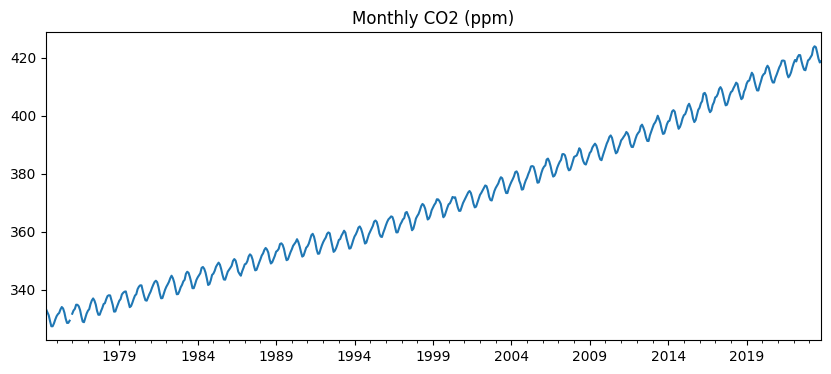

In [27]:
monthly.plot(figsize=(10, 4))
plt.title("Monthly CO2 (ppm)")
plt.show()

<Axes: >

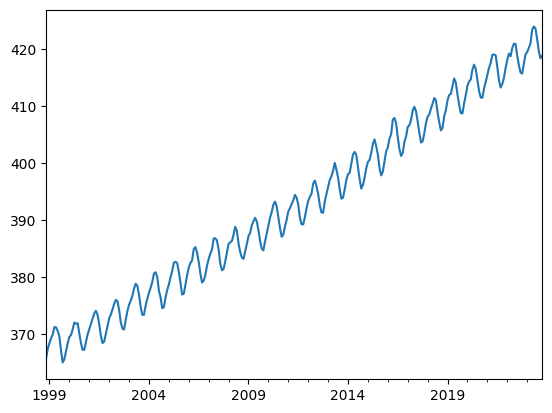

In [28]:
monthly[-300:].plot()

In [30]:
monthly.iloc[0]

333.1569230769231

In [33]:
monthly = (
    df["CO2 molfrac (ppm)"]
    .resample("M")
    .mean()
    .to_frame(name="CO2 molfrac (ppm)")
)

/tmp/ipykernel_891/3844906475.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('monthly',
                         monthly = monthly)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 2 items

test_monthly.py::TestMonthly::test_first_value PASSED                    [ 50%]
test_monthly.py::TestMonthly::test_missing PASSED                        [100%]

============================== 2 passed in 0.84s ===============================


💯 You can commit your code:

git add tests/monthly.pickle

git commit -m 'Completed monthly step'

git push origin master



## Eğitim Test Ayrımı

Şimdi eğitim ve test kümelerine ayırmamız gerekiyor (%80:%20 ayrımı yapacağız). Bunu yaparken dikkatli olun - kümelerimizin __sürekli__ olması gerekiyor!

In [35]:
split_idx = int(len(monthly) * 0.8)

train = monthly.iloc[:split_idx]
test = monthly.iloc[split_idx:]

Veri hazırlığımız neredeyse bitti. Ancak ayrıştırma ve modellemeye başlamadan önce, modelimizin nasıl performans gösterdiğini görmek için bir baseline oluşturmalıyız.

Seçeceğimiz tipik baseline, bize mevcut olan son değeri tahmin etmektir. Bizim durumumuzda, bu sadece `train` DataFrame'imizdeki son noktadır.

`test` DataFrame'inizde `naive_preds` adında bir sütun oluşturun ve bunu `train`'deki son mevcut veri noktamıza eşit olarak ayarlayın


In [36]:
last_train_value = train["CO2 molfrac (ppm)"].iloc[-1]
test["naive_preds"] = last_train_value

/tmp/ipykernel_891/3346103218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["naive_preds"] = last_train_value


Bunu yaptıktan sonra, iki sütun arasındaki ortalama mutlak hatayı hesaplayın ve bunu `baseline_mae` olarak ayarlayın.

In [37]:
baseline_mae = (test["CO2 molfrac (ppm)"] - test["naive_preds"]).abs().mean()
baseline_mae

14.503777783267303

In [38]:
from nbresult import ChallengeResult

result = ChallengeResult('baseline',
                         test = test,
                         baseline_mae = baseline_mae)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 3 items

test_baseline.py::TestBaseline::test_baseline_mae PASSED                 [ 33%]
test_baseline.py::TestBaseline::test_first_value PASSED                  [ 66%]
test_baseline.py::TestBaseline::test_missing PASSED                      [100%]

=============================== warnings summary ===============================
test_baseline.py::TestBaseline::test_first_value
  /home/selen/data/S17D4-S-arima-seasonal/tests/test_baseline.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

## Modellemeye Hazırlanmak

Bazı Zaman Serisi modelleriyle, verilerimizi modele atabilir ve onun bizim için ayrıştırmasını, durağan hale getirmesini ve sonra modellemesini umabiliriz (SARIMAX veya TBATS bunun iyi örnekleridir), ancak bunun yerine adım adım ilerleyeceğiz. Mevsimsellik ve trendi bizim için kaldıracak bir modele güvenmediğimiz için, bunları kendimiz halledeceğiz.

Derste gördüğünüz `seasonal_decompose` aracını import edin ve Zaman Serinizde her iki yöntemi de deneyin (hem "multiplicative" hem "additive").

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
decomp_add = seasonal_decompose(
    train["CO2 molfrac (ppm)"].interpolate("linear").dropna(),
    model="additive",
    period=12
)

In [42]:
decomp_mul = seasonal_decompose(
    train["CO2 molfrac (ppm)"].interpolate("linear").dropna(),
    model="multiplicative",
    period=12
)

Her ikisinden de residualleri (`.resid` attribute'una erişin) çizdirin ve unutmayın - zamandan mümkün olduğunce __etkilenmemiş__ görünen olanı istiyoruz

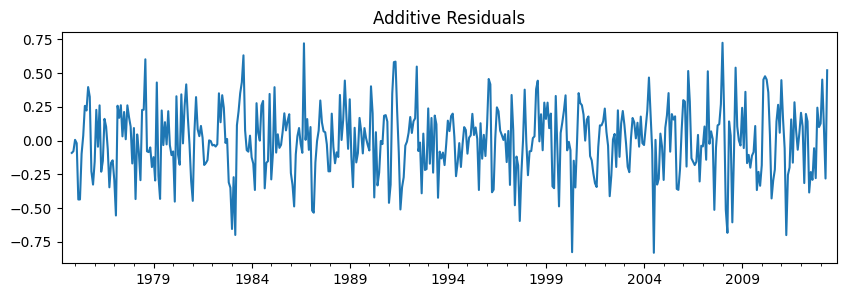

In [43]:
decomp_add.resid.plot(figsize=(10, 3))
plt.title("Additive Residuals")
plt.show()

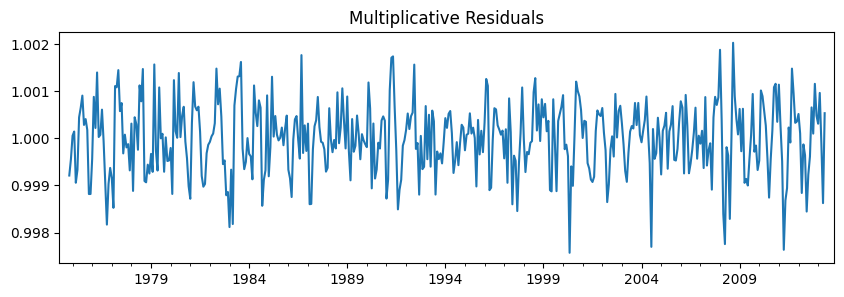

In [44]:
decomp_mul.resid.plot(figsize=(10, 3))
plt.title("Multiplicative Residuals")
plt.show()

Her ikisi de makul ölçüde durağan göründüğü için, multiplicative modeli seçeceğiz.

Şimdi stratejimiz zaman serimizin mevsimsel bileşenini çıkarmak.

Bunu nasıl yapabiliriz? 🤔


İlk olarak, `train` DataFrame'inizde zaman serinizin `.seasonal` bileşeniyle doldurulmuş `"seasonal_component"` adında bir sütun oluşturun.

Bunu yaptıktan sonra, sadece mevsimsel bileşenlerinizin __bir yılını__ içeren (yani `seasonal components` sütununuzun ilk 12 satırı) ayrı, daha küçük bir DataFrame oluşturun. Bu daha sonra bizim için yararlı olacak. Bunu `seasonal_one_year` olarak adlandırın ve karşılık gelen `index.month`'a eşit bir `"month"` sütununuz olduğundan emin olun (örneğin, Ocak mevsimsel bileşenine sahip bir satırınız ve yanında 1 olsun).

<img src = "https://wagon-public-datasets.s3.amazonaws.com/data-science-images/05-ML/09-Time-Series/seasonal_component_one.png">

In [47]:
train = train.copy()
train["seasonal_component"] = decomp_mul.seasonal

In [48]:
seasonal_components = train[["seasonal_component"]].copy()
seasonal_components["month"] = seasonal_components.index.month
seasonal_components

,seasonal_component,month
1974-05-31,1.008482,5
1974-06-30,1.006564,6
1974-07-31,1.001811,7
1974-08-31,0.995762,8
1974-09-30,0.990900,9
...,...,...
2013-07-31,1.001811,7
2013-08-31,0.995762,8
2013-09-30,0.990900,9
2013-10-31,0.990801,10


In [49]:
seasonal_one_year = (
    seasonal_components
    .iloc[:12]
    .reset_index(drop=True)
)

seasonal_one_year

,seasonal_component,month
0,1.008482,5
1,1.006564,6
2,1.001811,7
3,0.995762,8
4,0.990900,9
5,0.990801,10
6,0.994131,11
7,0.997567,12
8,1.000244,1
9,1.002097,2


Bu multiplicative bir modelden geldiği için, bu mevsimsel bileşeni __kaldırmak__ istiyorsak, orijinal zaman serimizi bu tekrarlanan (12 aylık döngü) değerlere __bölmemiz__ gerekecek.

In [50]:
from nbresult import ChallengeResult

result = ChallengeResult('seasonal',
                         train = train,
                         seasonal = seasonal_one_year)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 2 items

test_seasonal.py::TestSeasonal::test_seasonal_column PASSED              [ 50%]
test_seasonal.py::TestSeasonal::test_seasonal_year_shape PASSED          [100%]

============================== 2 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/seasonal.pickle

git commit -m 'Completed seasonal step'

git push origin master



Orijinal zaman serinizin değerini mevsimsel bileşene bölen `"seasonal_stripped"` adında yeni bir sütun oluşturun.

In [51]:
train["seasonal_stripped"] = train["CO2 molfrac (ppm)"] / train["seasonal_component"]

Bu yeni sütunu çizdirin:

<Axes: >

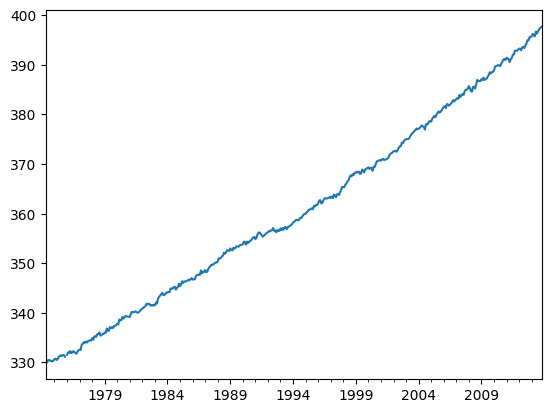

In [52]:
train["seasonal_stripped"].plot()

Henuz durağan görünüyor mu? Günün arkadaşınızla neden öyle olduğunu veya olmadığını tartışın.

Bir sonraki görevimiz bu __mevsimsellikten arındırılmış__ zaman serisini alıp durağan hale getirmek. `.diff()` kullanmayı deneyin ve nasıl göründüğüne bakın. Sonra herhangi bir değişiklik görmek için bir kez daha diff yapmayı deneyin.

<Axes: >

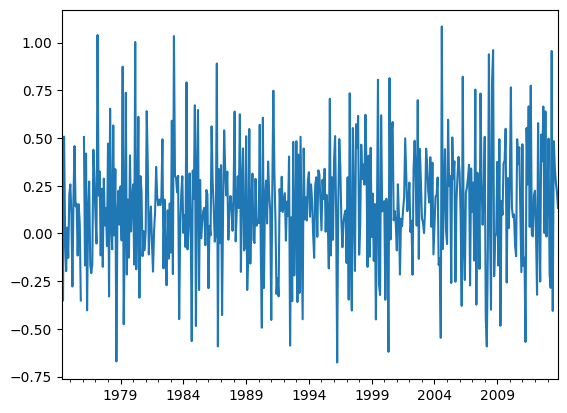

In [53]:
seasonal_diff = train["seasonal_stripped"].diff()
seasonal_diff.plot()

<Axes: >

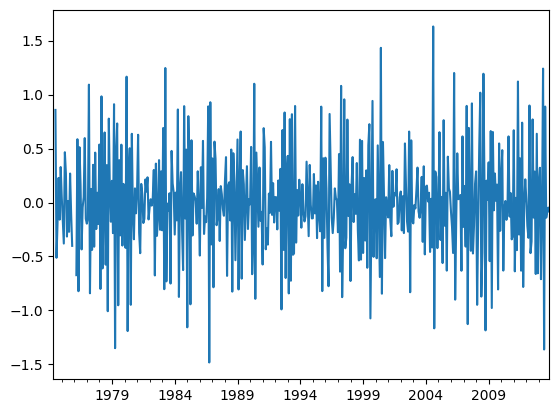

In [54]:
seasonal_diff2 = seasonal_diff.diff()
seasonal_diff2.plot()

Her ikisi de görsel olarak oldukça durağan görünmeli, her birinin durağan olduğunu doğrulamak için derste gördüğünüz `adfuller` (Augmented Dicky-Fuller) testini kullanın.

Not: `diff` yaptığınızda DataFrame'inizde null değerler oluşturursunuz, ADF testi yapmak için bunları düşürmeniz gerekir.

In [55]:
from statsmodels.tsa.stattools import adfuller

adf_1 = adfuller(seasonal_diff.dropna())
adf_1[1]

9.686681763750794e-19

In [56]:
adf_2 = adfuller(seasonal_diff2.dropna())
adf_2[1]

8.101284423589837e-09

Her ikisi de makul ölçüde durağan görünüyor ve aşırı differencing'e gerek yok gibi görünüyor (yine de daha sonra iki kez diff yapılmış bir zaman serisi oluşturmayı her zaman deneyebiliriz). Hadi `acf` ve `pacf` grafiklerimizi çizmeye devam edelim (herhangi bir `null` değeri düşürdüğünüzden emin olun - bunlar ACF ve PACF hesaplayıcılarınızı bozar) 😔

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

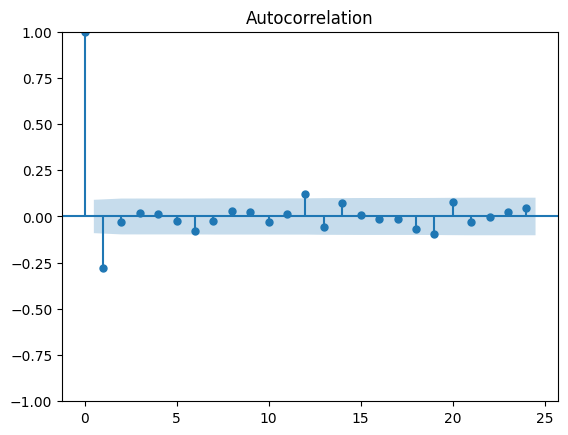

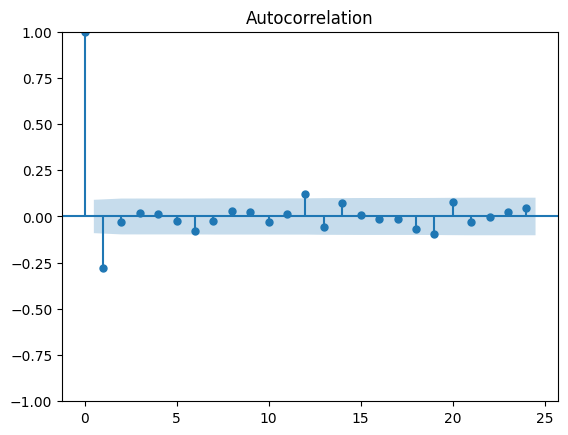

In [59]:
plot_acf(seasonal_diff.dropna(), lags=24)

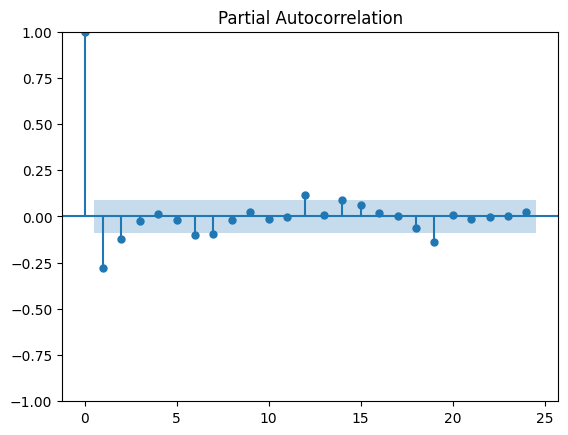

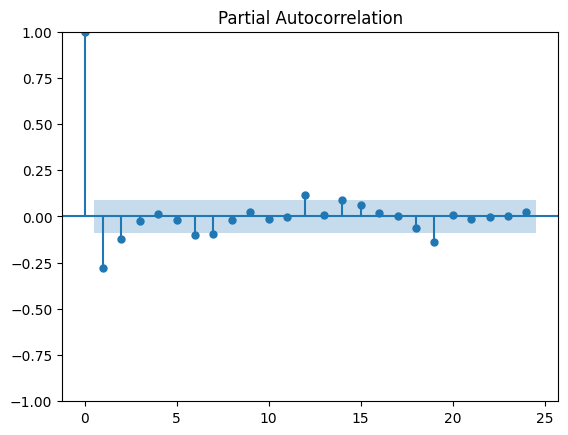

In [60]:
plot_pacf(seasonal_diff.dropna(), lags=24)

Bu grafiklerin gerçekte ne anlama geldiğini arkadaşınızla konuşmak için zaman ayırın. Hangisi sizin `p` parametrenize karşılık geliyor ve hangisi `q` parametrenize?

Şimdi `p` `d` ve `q` değerleriniz için uygun order değerleriyle basit bir ARIMA modeli oluşturun. Model özetini inceleyin.

In [61]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(
    train["seasonal_stripped"].dropna(),
    order=(1, 1, 1)
)

model_fit = model.fit()
model_fit.summary()

/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      seasonal_stripped   No. Observations:                  474
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -127.188
Date:                Sun, 18 Jan 2026   AIC                            260.376
Time:                        16:20:30   BIC                            272.853
Sample:                             0   HQIC                           265.283
                                - 474                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   3259.071      0.000       0.999       1.001
ma.L1         -0.9957      0.012    -86.409      0.000      -1.018      -0.973
sigma2         0.0996      0.006     15.965      0.000       0.087       0.112
===================================================================================
Ljung-Box (L1) (Q):                  38.31   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               1.07   Skew:                             0.12
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Özet hakkında ne fark ediyorsunuz? Buradaki en önemli özellikler neler?

Katsayılarımıza güvenebiliriz gibi görünüyor ve ~223'lük bir AIC'miz var. Ama bu en iyi model miydi? Farklı modelleri grid search yapmak ve hangisinin en iyi AIC'ye sahip olduğunu görmek için `auto_arima` fonksiyonunu kullanmayı deneyin

In [62]:
import pmdarima as pm

auto_model = pm.auto_arima(
    train["seasonal_stripped"].dropna(),
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=1,
    seasonal=False,
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)

/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/pytho

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=252.977, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=216.936, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=209.608, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=338.986, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=211.015, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=211.031, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=212.977, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=339.674, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.383 seconds


/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  474
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -101.804
Date:                Sun, 18 Jan 2026   AIC                            209.608
Time:                        16:21:16   BIC                            222.085
Sample:                             0   HQIC                           214.515
                                - 474                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1426      0.009     15.209      0.000       0.124       0.161
ma.L1         -0.3283      0.041     -7.934      0.000      -0.409      -0.247
sigma2         0.0900      0.006     16.292      0.000       0.079       0.101
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.81   Prob(JB):                         0.55
Heteroskedasticity (H):               1.13   Skew:                             0.01
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En iyi AIC skorunuzu `best_AIC`'ye kaydedin

In [64]:
best_AIC = auto_model.aic()
best_AIC

209.60785730670318

In [65]:
from nbresult import ChallengeResult

result = ChallengeResult('score',
                         aic_score = best_AIC)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 1 item

test_score.py::TestScore::test_AIC_score PASSED                          [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/score.pickle

git commit -m 'Completed score step'

git push origin master



Çoğu zaman, hangi modelin verilerimize en iyi uyacağını tahmin etmek zor olabilir, bu yüzden genellikle grid-search yapmak ve modellerimizin AIC skorlarını karşılaştırmak iyi bir fikirdir 🧐 Burada, bir __(0,1,1)__ modelinin daha iyi bir AIC skoru aldığı görünüyor (yani orijinal modelimizin MA bileşenleri muhtemelen model likelihood'ımızı o kadar iyileştirmiyordu!)

### Tahminler Yapmak (biraz Pandas çalışmasına hazır olun!)

Artik en iyi modelimize sahip olduğumuza göre, bazı tahminler ve - önemlisi - bazı güven aralıkları oluşturmak istiyoruz. Test setinizin uzunluğu için tahmin yapmak üzere modelinizi kullanın ve bu aralıkları da döndürdüğünüzden emin olun (`return_conf_int = True` kullanın). `preds`, `upper` ve `lower` sınırları için sütunlar içeren bir `preds_df` DataFrame oluşturun.

In [66]:
n_periods = len(test)
n_periods

119

In [67]:
preds, conf_int = auto_model.predict(
    n_periods=n_periods,
    return_conf_int=True
)

/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/selen/.pyenv/versions/3.12.9/envs/workintech/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 

In [68]:
preds_df = pd.DataFrame(
    {
        "preds": preds,
        "lower": conf_int[:, 0],
        "upper": conf_int[:, 1],
    },
    index=test.index
)

preds_df.head()

,preds,lower,upper
2013-12-31,NaN,397.236484,398.412613
2014-01-31,NaN,397.258768,398.675560
2014-02-28,NaN,397.298712,398.920848
2014-03-31,NaN,397.350267,399.154524
2014-04-30,NaN,397.410206,399.379817


In [69]:
from nbresult import ChallengeResult

result = ChallengeResult('preds',
                         preds_df = preds_df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 2 items

test_preds.py::TestPreds::test_df_values PASSED                          [ 50%]
test_preds.py::TestPreds::test_preds_cols PASSED                         [100%]

============================== 2 passed in 0.39s ===============================


💯 You can commit your code:

git add tests/preds.pickle

git commit -m 'Completed preds step'

git push origin master



Şimdi bunları çizdirin ve `train` verilerinizle karşılaştırıldığında nasıl göründüklerine bakın

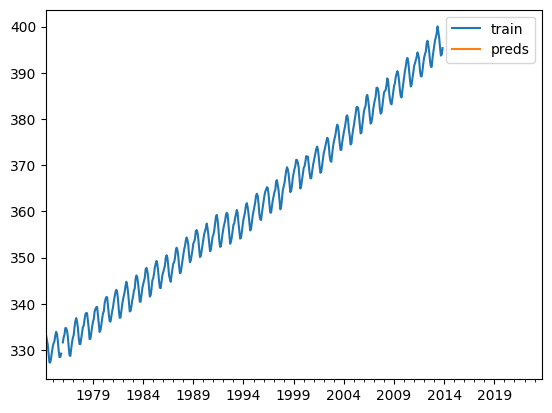

In [70]:
train["CO2 molfrac (ppm)"].plot(label="train")
preds_df["preds"].plot(label="preds")
plt.legend()

Bir şeyler biraz yanlış görünüyor, değil mi? Açıkça mevsimsellik olan bir şeyden çıkan üç düz çizgiye bakıyoruz. Bunu hesaba katmak için, daha önce çıkardığımız mevsimsellik bileşenini yeniden dahil etmemiz gerekiyor!

`preds_df` DataFrame'inizde bir `month` sütunu oluşturun ve bunu index'in ay bileşeniyle doldurun.

In [71]:
preds_df["month"] = preds_df.index.month

Artık daha önce oluşturduğumuz `seasonal_one_year` DataFrame'ini alıp `preds_df`'imize basitçe merge edebiliriz!

In [72]:
preds_df = preds_df.merge(
    seasonal_one_year,
    on="month",
    how="left"
)

In [73]:
preds_df["full_preds"] = preds_df["preds"] * preds_df["seasonal_component"]
preds_df["upper_conf"] = preds_df["upper"] * preds_df["seasonal_component"]
preds_df["lower_conf"] = preds_df["lower"] * preds_df["seasonal_component"]

In [74]:
preds_df.index = test.index

In [75]:
preds_df

,preds,lower,upper,month,seasonal_component,full_preds,upper_conf,lower_conf
2013-12-31,NaN,397.236484,398.412613,12,0.997567,NaN,397.443319,396.270052
2014-01-31,NaN,397.258768,398.675560,1,1.000244,NaN,398.773014,397.355876
2014-02-28,NaN,397.298712,398.920848,2,1.002097,NaN,399.757469,398.131932
2014-03-31,NaN,397.350267,399.154524,3,1.004264,NaN,400.856598,399.044647
2014-04-30,NaN,397.410206,399.379817,4,1.007375,NaN,402.325241,400.341104
...,...,...,...,...,...,...,...,...
2023-06-30,NaN,409.824764,418.340738,6,1.006564,NaN,421.086827,412.514953
2023-07-31,NaN,409.949100,418.501633,7,1.001811,NaN,419.259574,410.691551
2023-08-31,NaN,410.073514,418.662451,8,0.995762,NaN,416.888288,408.335748
2023-09-30,NaN,410.198004,418.823192,9,0.990900,NaN,415.012014,406.465313


Şimdi `preds_df` DataFrame'inde yeni sütunlar olarak `full_preds`, `upper_conf` ve `lower_conf`'ı (`preds`, `upper` __ve__ `lower` sütunlarınızı `preds_df` DataFrame'imizde artık sahip olduğumuz mevsimsel bileşenle çarparak) oluşturabilirsiniz.

In [ ]:
# YOUR CODE HERE

Son olarak, plotting'i bizim için kolaylaştırmak için, `preds_df`'nizin index'ini `test` DataFrame'inizin index'iyle aynı olacak şekilde ayarlayın (aynı uzunluğa sahip oldukları için bu bizim için oldukça kolay olmalı!)

In [ ]:
# YOUR CODE HERE

In [76]:
from nbresult import ChallengeResult

result = ChallengeResult('fullpreds',
                         preds_df = preds_df)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/data/S17D4-S-arima-seasonal/tests
plugins: anyio-4.8.0, typeguard-4.4.2, dash-3.3.0
collecting ... collected 2 items

test_fullpreds.py::TestFullpreds::test_columns PASSED                    [ 50%]
test_fullpreds.py::TestFullpreds::test_index PASSED                      [100%]

============================== 2 passed in 0.42s ===============================


💯 You can commit your code:

git add tests/fullpreds.pickle

git commit -m 'Completed fullpreds step'

git push origin master



Şimdi her şeyi çizdirin - train'inizin sonu (örneğin son 100 değer), tam tahminleriniz, üst ve alt güven sınırları ve `preds_df` DataFrame'inizden gerçek değerler __ve__ baseline'nız!

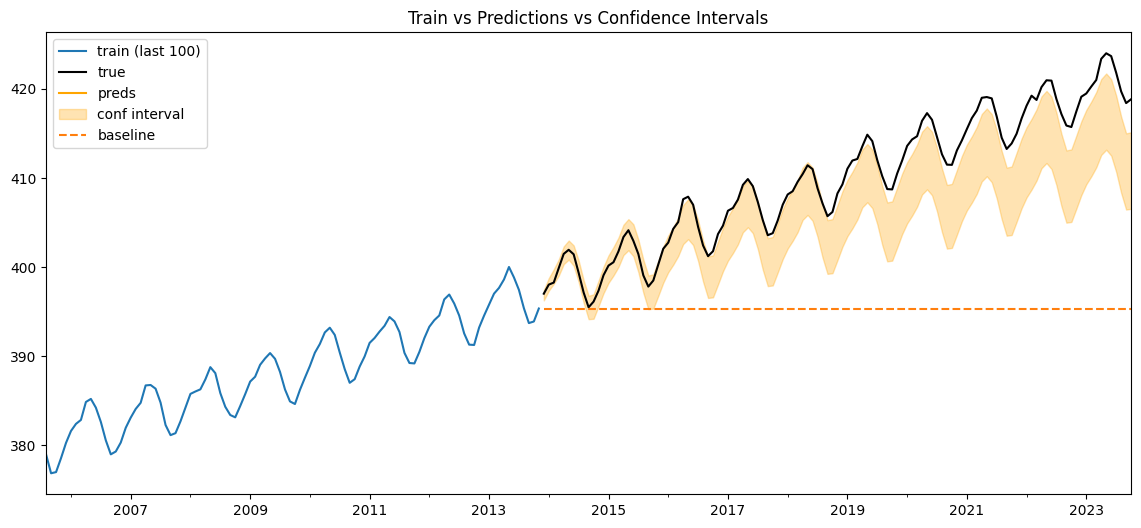

In [77]:
plt.figure(figsize=(14, 6))

# train'in son 100 değeri
train["CO2 molfrac (ppm)"].iloc[-100:].plot(label="train (last 100)")

# gerçek test değerleri
test["CO2 molfrac (ppm)"].plot(label="true", color="black")

# tahminler
preds_df["full_preds"].plot(label="preds", color="orange")

# güven aralıkları
plt.fill_between(
    preds_df.index,
    preds_df["lower_conf"],
    preds_df["upper_conf"],
    color="orange",
    alpha=0.3,
    label="conf interval"
)

# baseline (naive)
test["naive_preds"].plot(label="baseline", linestyle="--")

plt.legend()
plt.title("Train vs Predictions vs Confidence Intervals")
plt.show()

Tahminlerimiz oldukça iyi görünüyor! Gerçek değerlerin tahmin ettiklerimizden biraz daha yüksek olduğunu görebiliyoruz ancak tahmin yapmaya başladığımız zamandan tam 10 yıl sonrası için güven aralıklarımızın sınırları içinde iyi bir şekilde kalıyor.

Neden değerlerimiz gerçek değerlerin altına düştü? Test verisini ayrıştırmak ve trend bileşenine bakmak için aşağıdaki hücreyi çalıştırın 👀


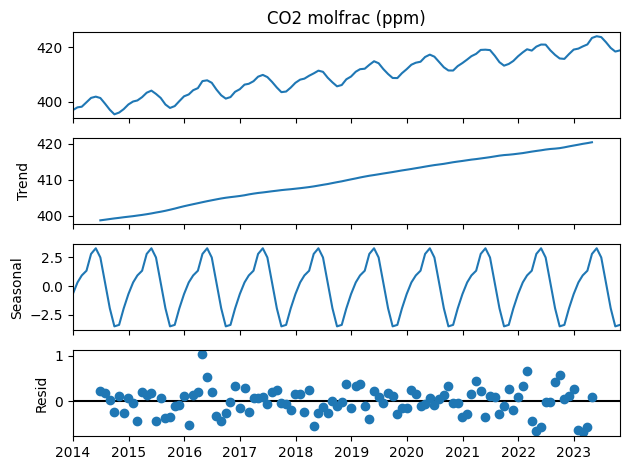

In [78]:
seasonal_decompose(test["CO2 molfrac (ppm)"]).plot();

2016-2018'de normal (biraz daha sığ) trend tekrar devralınmadan önce tüm değerlerimizde __hafif bir artis__ olduğu görünüyor. Bu, test veri setimizde basitçe tahmin edemeyeceğimiz bir şeyin meydana gelmesinin harika bir örneği. CO2 okumalarında neden bir artış olduğunu bilmiyoruz - ve bunun için tahmin yapamadık.

❗ Zaman Serisi ile modelleme yaptığımızda, __sihirli bir şekilde geleceği tahmin edemeyiz__. Yapmaya çalıştığımız şey, geçmişin desenlerini doğru bir şekilde yakalamak ve sonra bunları genişletmektir.

- Çoğu zaman, ham tahminleriniz (mevsimsel bileşen olmadan) oldukça sıkıcı düz bir çizgi gibi görünecektir 🙄 (mevcut başlangıç tahminlerimizin yaptığı gibi) ancak bu beklediğimiz bir şey
- Zaman Serisi analizi yaparken elde ettiğimiz değerin çoğu, trendlerimizi, mevsimsel bileşenlerimizi ve güven aralıklarımızı __nicelleştirebilmemizde__ yatıyor, böylece iyi bilgilendirilmiş kararlar verebiliriz ✅

Son olarak, modelimizin baseline'ımızdan ne kadar daha iyi olduğunu hızlıca nicelleyelim. `preds`'leriniz (mevsimsel bileşenleriyle birlikte) ve gerçek değerler arasındaki ortalama mutlak hatayı hesaplayın. `model_mae`'nizin orijinal `baseline_mae`'den düşük olup olmadığına bakın.

In [79]:
model_mae = (test["CO2 molfrac (ppm)"] - preds_df["full_preds"]).mean()

In [80]:
model_mae = (test["CO2 molfrac (ppm)"] - preds_df["full_preds"]).abs().mean()
model_mae

nan

Final MAE'miz orijinal baseline'ımızdan __çok__ daha iyi olmalı. Harika iş 🥳 